In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Komilo_proj/Datasets/MMA_Modified_Datasets/P1_Movement_Data.csv')

In [ ]:
df.head()

,13:27:53,0.91,-0.386,0.2146,30.8105,-11.228,5.5688,Standing
0,13:27:54,0.9881,-0.3030,0.0738,68.1274,-61.1987,3.8818,Standing
1,13:27:55,0.9055,-0.3821,-0.2056,15.5371,-13.1592,-12.0776,Standing
2,13:27:56,0.9702,-0.1489,-0.1674,24.3384,3.9111,-17.6685,Standing
3,13:27:57,1.0354,0.0866,0.0185,-102.0581,34.3457,-12.2754,Standing
4,13:27:58,0.9916,-0.2309,-0.1451,-11.7432,-17.8638,-20.2344,Standing


In [ ]:
# Check for missing values
print(df.isnull().sum())

13:27:53    0
0.91        0
-0.386      0
0.2146      0
30.8105     0
-11.228     0
5.5688      0
Standing    0
dtype: int64


In [ ]:
 df.columns = ['Time', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Movement']

In [ ]:
missing_movement = df[df[['Movement']].isnull().values]
missing_movement
len(missing_movement)

0

In [ ]:
df.Movement.value_counts(dropna=False)

,count
Movement,
Ruminating,53629
Eating,26176
Standing,20229
Sleeping,10099
Sitting,9807
Walking,2384
Sitting,1944
Eating,242
Drinking,89


In [ ]:
if 'filename' in df.columns:
    cleaned_df = df.drop('filename', axis=1).dropna(subset=['Movement', 'Time'])
else:
    cleaned_df = df.dropna(subset=['Movement','Time'])

cleaned_df.Movement = cleaned_df.Movement.apply(str.upper)
cleaned_df.Movement.value_counts(dropna=False)

cleaned_df.Movement = cleaned_df.Movement.apply(str.upper)
cleaned_df.Movement.value_counts(dropna=False)

,count
Movement,
RUMINATING,53629
EATING,26176
STANDING,20229
SLEEPING,10099
SITTING,9807
WALKING,2384
SITTING,1944
EATING,242
DRINKING,89


In [ ]:
unique_Movement = df['Movement'].unique()
print("Unique Movements:", unique_Movement)

Unique Movements: ['Standing' 'Ruminating' 'Walking' 'Sitting' 'Walking ' 'Sitting '
 'Eating' 'Drinking' ' Eating' 'Sleeping' "Walking'"]


In [ ]:
df['Movement'] = df['Movement'].str.strip()

In [ ]:
df['Movement'] = df['Movement'].str.title()

In [ ]:
df['Movement'] = df['Movement'].replace({
    'Drinking': 'Eating',    # Merge 'Drinking' into 'Eating'
    "Walking'": 'Walking',  # Fix incorrect label
    'walking': 'Walking',   # Ensure consistency with case
})

In [ ]:
unique_Movement = df['Movement'].unique()
Movement_counts = df['Movement'].value_counts()
missing_values = df['Movement'].isna().sum()

print("Unique Movements:", unique_Movement)
print("\nMovement counts:")
print(Movement_counts)
print(f"\nTotal rows: {len(df)}")
print(f"Missing values in Movement column: {missing_values}")

Unique Movements: ['Standing' 'Ruminating' 'Walking' 'Sitting' 'Eating' 'Sleeping']

Movement counts:
Movement
Ruminating    53629
Eating        26507
Standing      20229
Sitting       11751
Sleeping      10099
Walking        2389
Name: count, dtype: int64

Total rows: 124604
Missing values in Movement column: 0


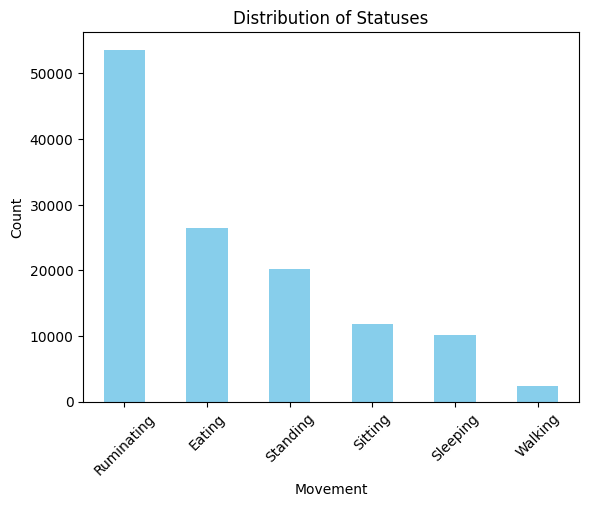

In [ ]:
import matplotlib.pyplot as plt

Movement_counts.plot(kind='bar', title='Distribution of Statuses', color='skyblue')
plt.xlabel('Movement')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
missing_time = cleaned_df[cleaned_df['Time'].isnull().values]
missing_time
len(missing_time)

0

In [ ]:
cleaned_df.describe(include='all')

,Time,Ax,Ay,Az,Gx,Gy,Gz,Movement
count,124604,124604.000000,124604.000000,124604.000000,124604.000000,124604.000000,124604.000000,124604
unique,86400,NaN,NaN,NaN,NaN,NaN,NaN,9
top,13:27:54,NaN,NaN,NaN,NaN,NaN,NaN,RUMINATING
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,53629
mean,NaN,0.767889,-0.196059,0.250522,-0.309151,0.407987,-0.350134,NaN
std,NaN,0.356880,0.239400,0.419559,21.977255,13.245337,11.018271,NaN
min,NaN,-0.906600,-2.371500,-1.957200,-378.366600,-201.272000,-225.817900,NaN
25%,NaN,0.750800,-0.337100,-0.032500,-1.630900,-0.432100,-1.264600,NaN
50%,NaN,0.919300,-0.211800,0.170800,0.061000,0.417500,-0.024400,NaN
75%,NaN,0.972800,-0.012900,0.421325,1.621100,1.611300,0.922900,NaN


In [ ]:
print(df.columns)

Index(['Time', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Movement'], dtype='object')


In [ ]:
print(df.head())

       Time      Ax      Ay      Az        Gx       Gy       Gz  Movement
0  13:27:54  0.9881 -0.3030  0.0738   68.1274 -61.1987   3.8818  Standing
1  13:27:55  0.9055 -0.3821 -0.2056   15.5371 -13.1592 -12.0776  Standing
2  13:27:56  0.9702 -0.1489 -0.1674   24.3384   3.9111 -17.6685  Standing
3  13:27:57  1.0354  0.0866  0.0185 -102.0581  34.3457 -12.2754  Standing
4  13:27:58  0.9916 -0.2309 -0.1451  -11.7432 -17.8638 -20.2344  Standing


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124604 entries, 0 to 124603
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      124604 non-null  object 
 1   Ax        124604 non-null  float64
 2   Ay        124604 non-null  float64
 3   Az        124604 non-null  float64
 4   Gx        124604 non-null  float64
 5   Gy        124604 non-null  float64
 6   Gz        124604 non-null  float64
 7   Movement  124604 non-null  object 
dtypes: float64(6), object(2)
memory usage: 7.6+ MB
None


In [ ]:
print(df.describe())

                  Ax             Ay             Az             Gx  \
count  124604.000000  124604.000000  124604.000000  124604.000000   
mean        0.767889      -0.196059       0.250522      -0.309151   
std         0.356880       0.239400       0.419559      21.977255   
min        -0.906600      -2.371500      -1.957200    -378.366600   
25%         0.750800      -0.337100      -0.032500      -1.630900   
50%         0.919300      -0.211800       0.170800       0.061000   
75%         0.972800      -0.012900       0.421325       1.621100   
max         6.502300       1.357000       1.170700     349.079700   

                  Gy             Gz  
count  124604.000000  124604.000000  
mean        0.407987      -0.350134  
std        13.245337      11.018271  
min      -201.272000    -225.817900  
25%        -0.432100      -1.264600  
50%         0.417500      -0.024400  
75%         1.611300       0.922900  
max       312.534200     452.456100  


In [ ]:
print(df)

            Time      Ax      Ay      Az        Gx       Gy       Gz  Movement
0       13:27:54  0.9881 -0.3030  0.0738   68.1274 -61.1987   3.8818  Standing
1       13:27:55  0.9055 -0.3821 -0.2056   15.5371 -13.1592 -12.0776  Standing
2       13:27:56  0.9702 -0.1489 -0.1674   24.3384   3.9111 -17.6685  Standing
3       13:27:57  1.0354  0.0866  0.0185 -102.0581  34.3457 -12.2754  Standing
4       13:27:58  0.9916 -0.2309 -0.1451  -11.7432 -17.8638 -20.2344  Standing
...          ...     ...     ...     ...       ...      ...      ...       ...
124599  00:40:14  0.7871 -0.3940 -0.4926   62.0508 -25.4053  -5.9985  Standing
124600  00:40:15  0.9218 -0.4495 -0.1153  -16.5332  31.6333 -14.6240  Standing
124601  00:40:16  0.8923 -0.4409 -0.1630   17.4365  -5.9106   9.7729  Standing
124602  00:40:17  1.0707 -0.1260 -0.2900    9.1162 -13.6084 -19.9316  Standing
124603  00:40:18  0.8837 -0.4860  0.0643   -7.4023  20.9058  -8.4375  Standing

[124604 rows x 8 columns]


In [ ]:
df.to_csv("/content/drive/MyDrive/Komilo_proj/Data_Preparation/My_Work/Cleaned_Final_P1_Movement_Data.csv", index=False)